In [18]:
import pandas as pd
import janitor
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import math
%matplotlib inline

In [19]:
outdir="wos_processed_data"

wos = pd.read_excel(f"{outdir}/wos_processed.xlsx")

wos_addresses = pd.read_excel(f"{outdir}/wos_addresses.xlsx")

wos_affiliations = pd.read_excel(f"{outdir}/wos_affiliations.xlsx")
wos_affiliations = wos_affiliations[wos_affiliations["Affiliations"]!="UNKNOWN"].copy()

wos_author_locations = pd.read_excel(f"{outdir}/wos_author_locations.xlsx")

wos_univ_locations = pd.read_excel(f"{outdir}/wos_univ_locations.xlsx")

In [20]:
record_col = "UT (Unique WOS ID)"

# Output - per yer, by Metrix taxonomy

## Domains

In [21]:
group = 'Domain_English'
data = wos.groupby(group, as_index=False)[record_col].nunique().sort_values(ascending=False, by=record_col)
data

Domain_English  UT (Unique WOS ID)
0            Applied Sciences                5379
5            Natural Sciences                1649
3             Health Sciences                1106
2  Economic & Social Sciences                 289
4               Miscellaneous                 156
1           Arts & Humanities                  13

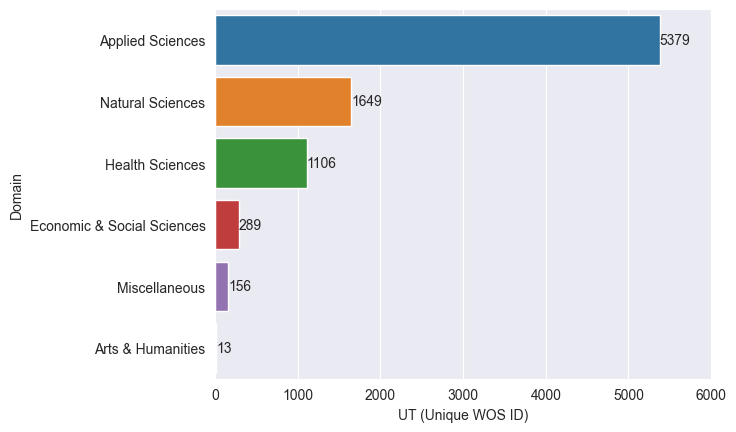

In [22]:
g = sns.barplot(data, x=record_col, y=group)
g.set_xlim(0,6000)
g.set_ylabel("Domain")
for i in g.containers:
    g.bar_label(i,)

In [23]:
group = ['Publication Year','Domain_English']
data = wos.groupby(group)[record_col].nunique().unstack(fill_value=0).stack().reset_index().rename(columns={0:record_col}).sort_values(ascending=False, by=group+[record_col])
data

Publication Year              Domain_English  UT (Unique WOS ID)
65              2022            Natural Sciences                 524
64              2022               Miscellaneous                  41
63              2022             Health Sciences                 368
62              2022  Economic & Social Sciences                 106
61              2022           Arts & Humanities                   4
..               ...                         ...                 ...
4               2012               Miscellaneous                   3
3               2012             Health Sciences                   2
2               2012  Economic & Social Sciences                   0
1               2012           Arts & Humanities                   0
0               2012            Applied Sciences                  21

[66 rows x 3 columns]

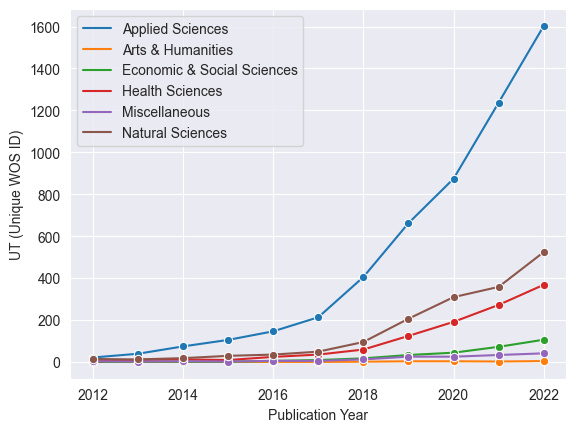

In [24]:
g=sns.lineplot(data.sort_values(ascending=True, by=group[-1]),y=record_col,x=group[0], hue=group[-1], marker="o")
g.set(xticks=list(range(2012,2022+1,2)))
g.legend(title=None)

## Field

In [25]:
group = ['Publication Year',"Domain_English",'Field_English']
data = wos.groupby(group, as_index=False)[record_col].nunique().sort_values(ascending=False, by=group+[record_col])
data

Publication Year    Domain_English   
176              2022  Natural Sciences  \
175              2022  Natural Sciences   
174              2022  Natural Sciences   
173              2022  Natural Sciences   
172              2022  Natural Sciences   
..                ...               ...   
4                2012     Miscellaneous   
3                2012   Health Sciences   
2                2012  Applied Sciences   
1                2012  Applied Sciences   
0                2012  Applied Sciences   

                                Field_English  UT (Unique WOS ID)  
176                       Physics & Astronomy                 205  
175                  Mathematics & Statistics                  61  
174            Earth & Environmental Sciences                 134  
173                                 Chemistry                  81  
172                                   Biology                  43  
..                                        ...                 ...  
4                               Miscellaneous                   3  
3                           Clinical Medicine                   2  
2    Information & Communication Technologies                  14  
1                                 Engineering                   5  
0           Agriculture, Fisheries & Forestry                   2  

[177 rows x 4 columns]

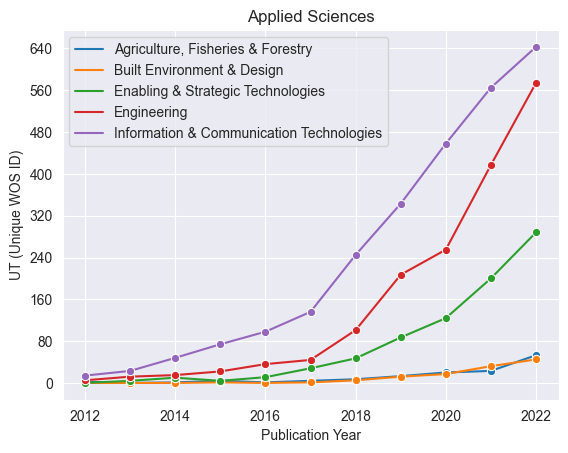

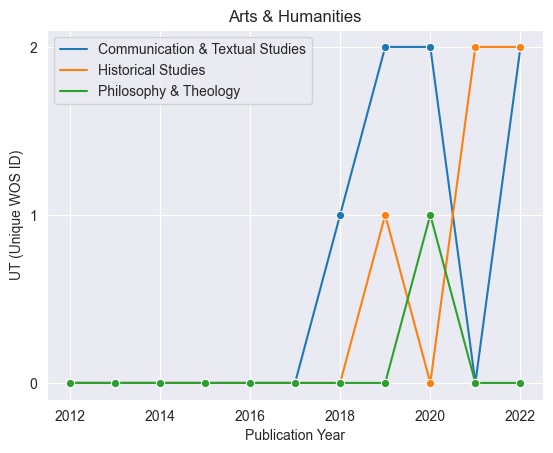

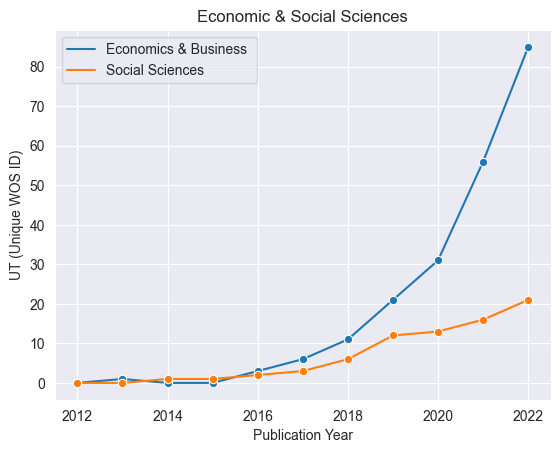

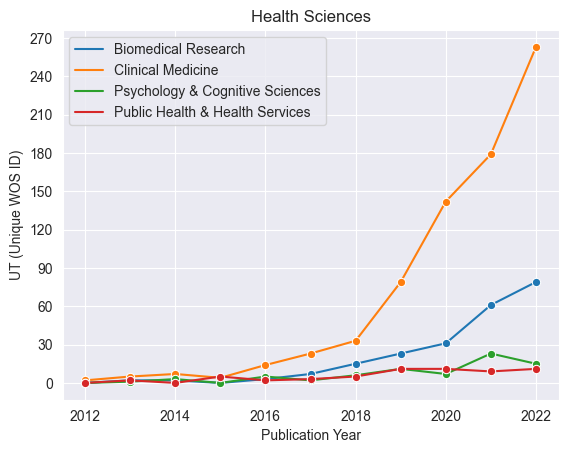

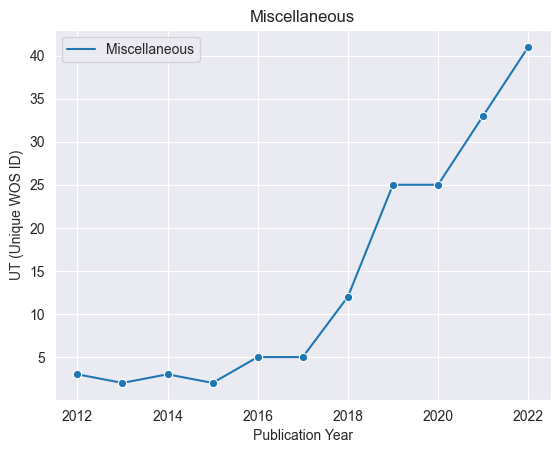

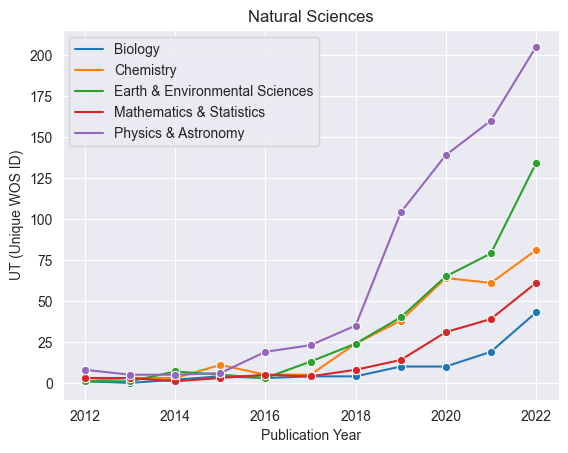

In [26]:
for cat in sorted(data[group[-2]].unique()):
    #data segment
    sub_data = data[data[group[-2]]==cat]
    sub_data = sub_data.complete({group[0]:range(int(data[group[0]].min()), int(data[group[0]].max()) + 1)}
                                 ,group[-1],fill_value=0)
    #plot
    g=sns.lineplot(sub_data.sort_values(ascending=True, by=group[-1]),
                   y=record_col,x=group[0], hue=group[-1], marker="o")
    g.set(xticks=list(range(2012,2022+1,2)))
    g.legend(title=None)
    g.set_title(cat)
    g.yaxis.set_major_locator(MaxNLocator(integer=True))
    plt.show()

## SubField

In [27]:
group = ['Publication Year',"Domain_English",'Field_English',"SubField_English"]
data = wos.groupby(group, as_index=False)[record_col].nunique().sort_values(ascending=False, by=group+[record_col])
data

Publication Year    Domain_English   
774              2022  Natural Sciences  \
773              2022  Natural Sciences   
772              2022  Natural Sciences   
771              2022  Natural Sciences   
770              2022  Natural Sciences   
..                ...               ...   
4                2012  Applied Sciences   
3                2012  Applied Sciences   
2                2012  Applied Sciences   
1                2012  Applied Sciences   
0                2012  Applied Sciences   

                                Field_English   
774                       Physics & Astronomy  \
773                       Physics & Astronomy   
772                       Physics & Astronomy   
771                       Physics & Astronomy   
770                       Physics & Astronomy   
..                                        ...   
4    Information & Communication Technologies   
3                                 Engineering   
2                                 Engineering   
1                                 Engineering   
0           Agriculture, Fisheries & Forestry   

                               SubField_English  UT (Unique WOS ID)  
774                                      Optics                  56  
773                  Nuclear & Particle Physics                  28  
772                        Mathematical Physics                   2  
771                             General Physics                  14  
770                            Fluids & Plasmas                  21  
..                                          ...                 ...  
4    Artificial Intelligence & Image Processing                  10  
3           Mechanical Engineering & Transports                   1  
2           Industrial Engineering & Automation                   3  
1            Geological & Geomatics Engineering                   1  
0                                  Food Science                   2  

[775 rows x 5 columns]

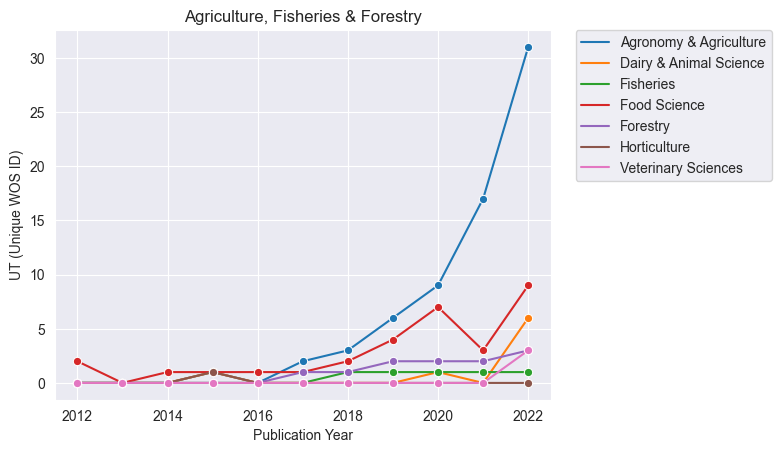

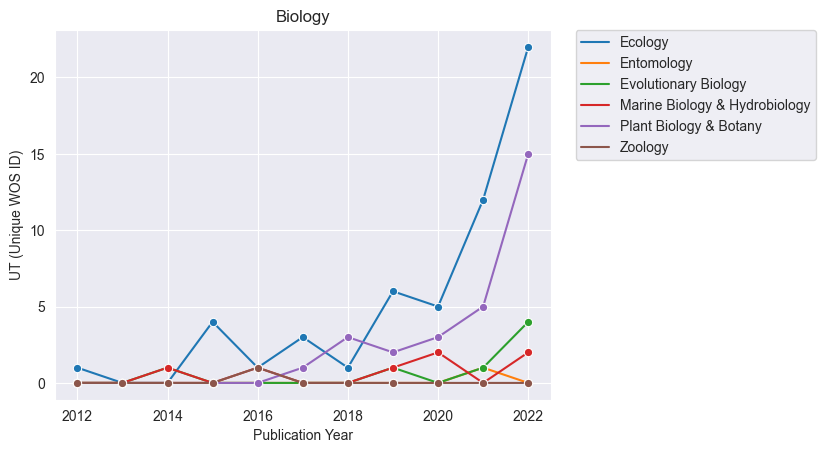

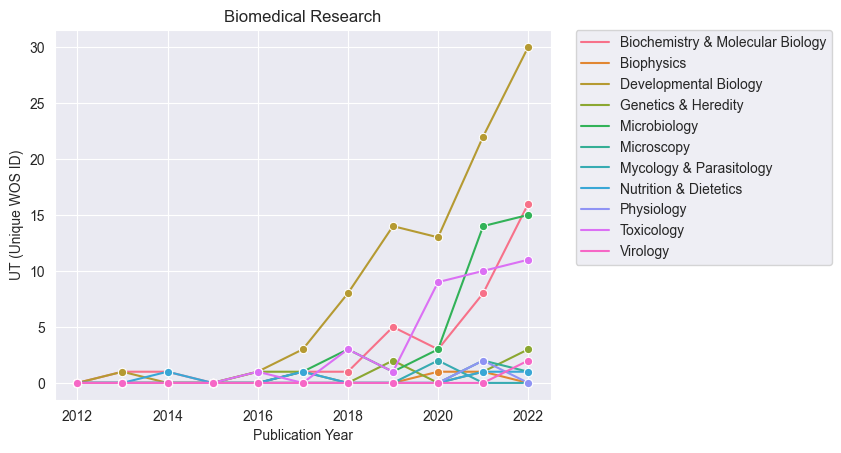

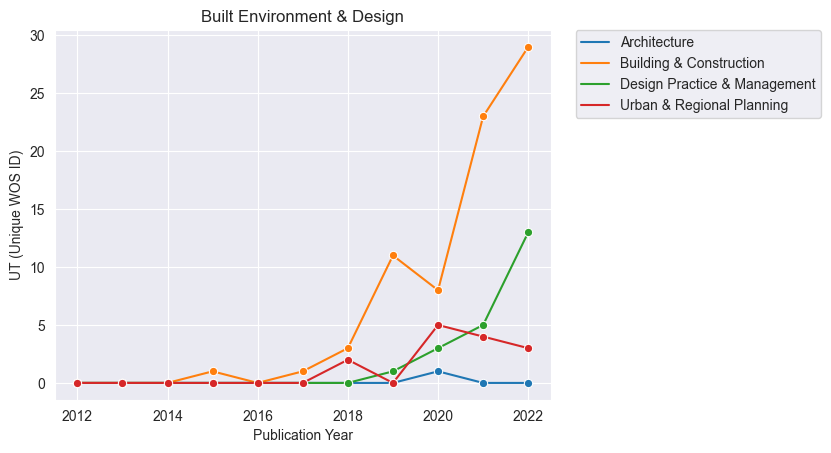

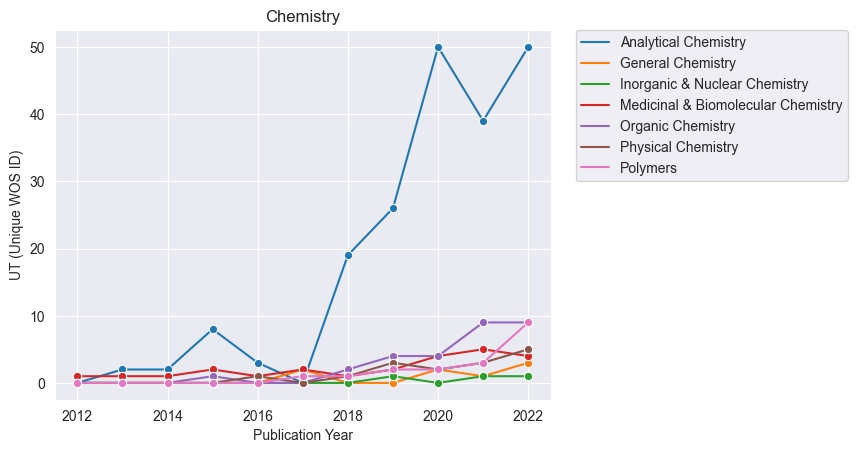

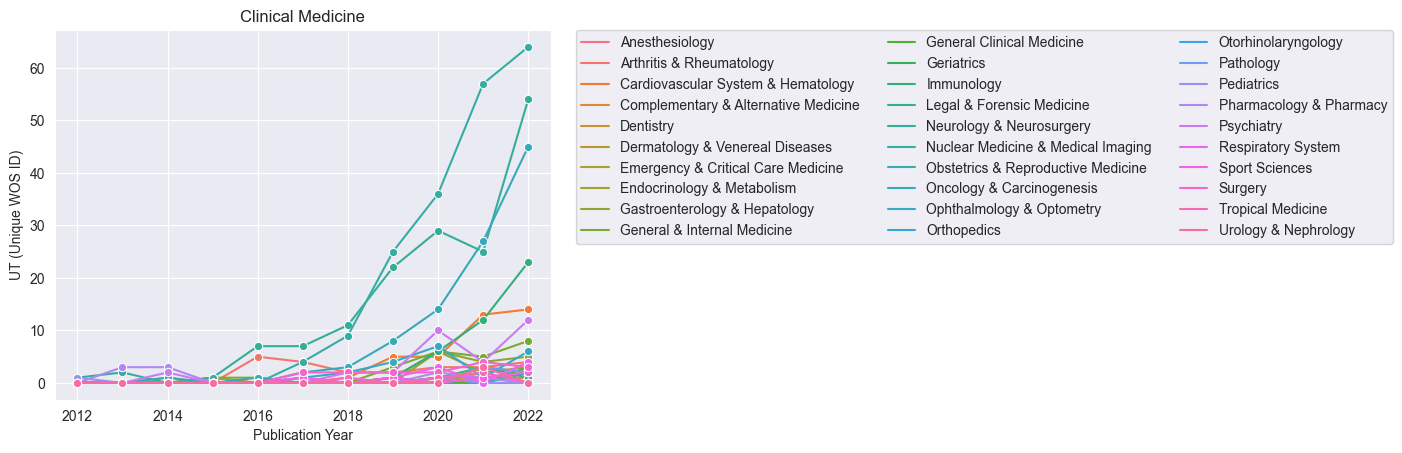

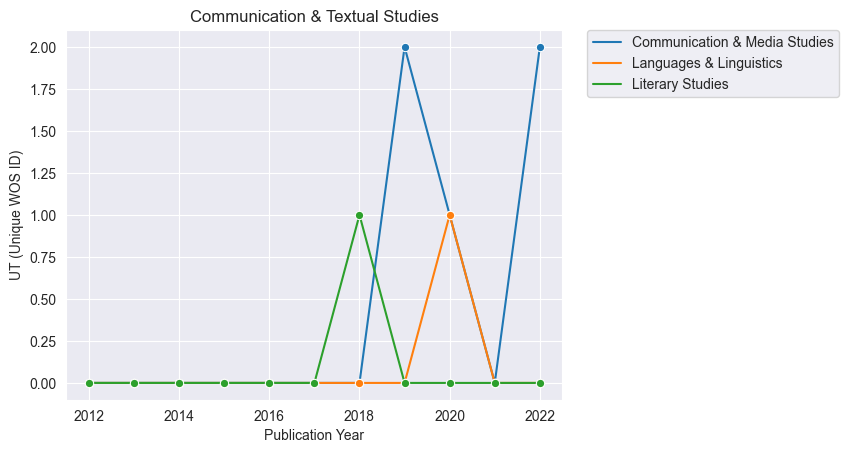

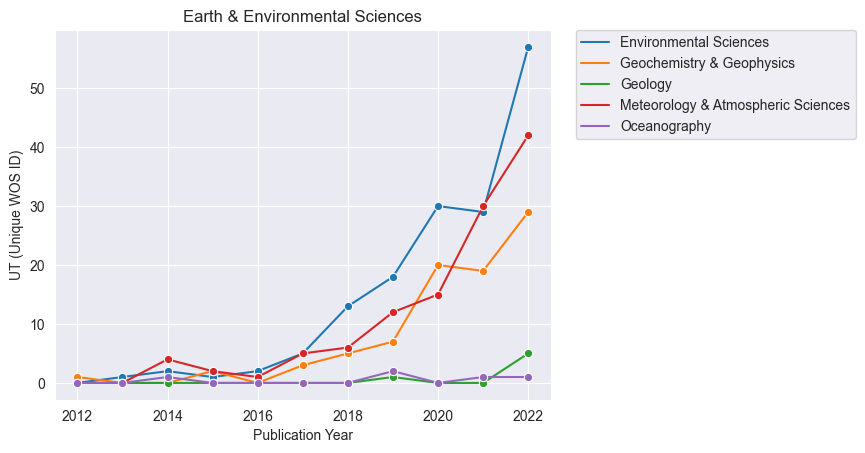

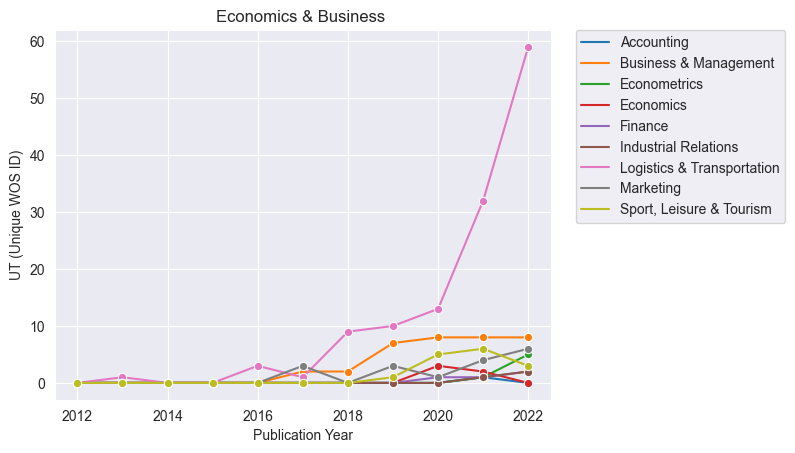

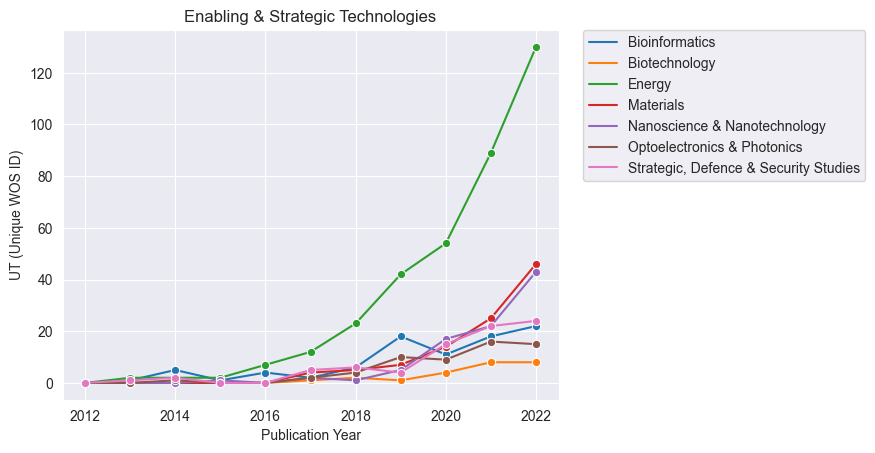

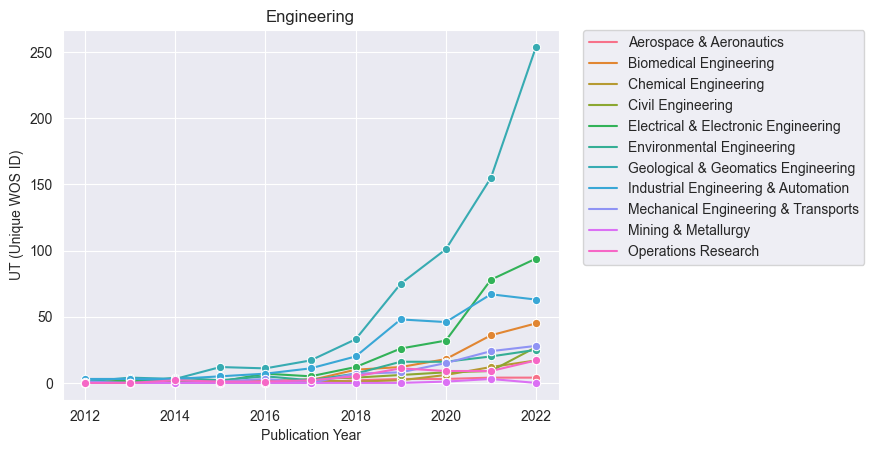

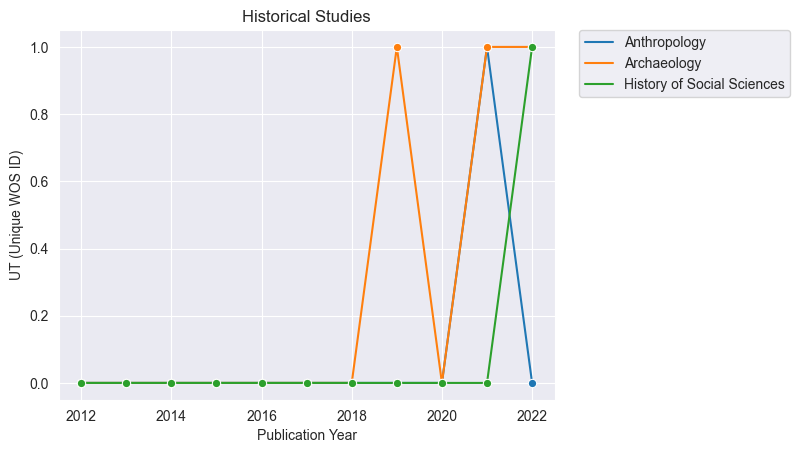

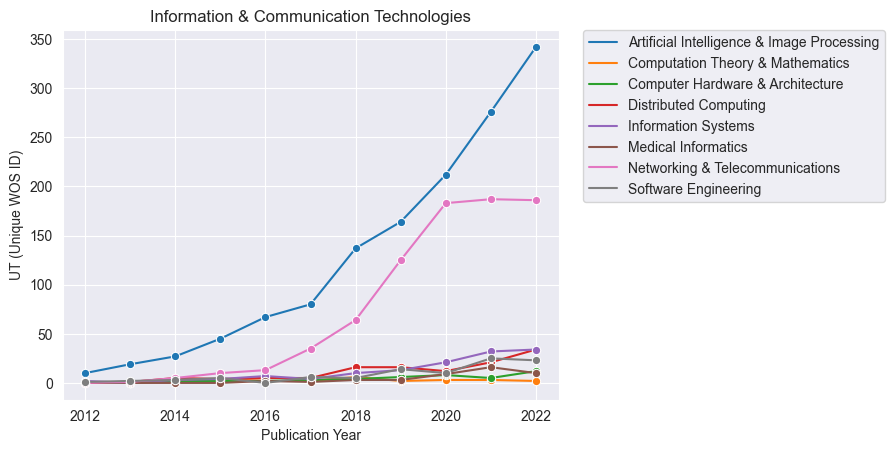

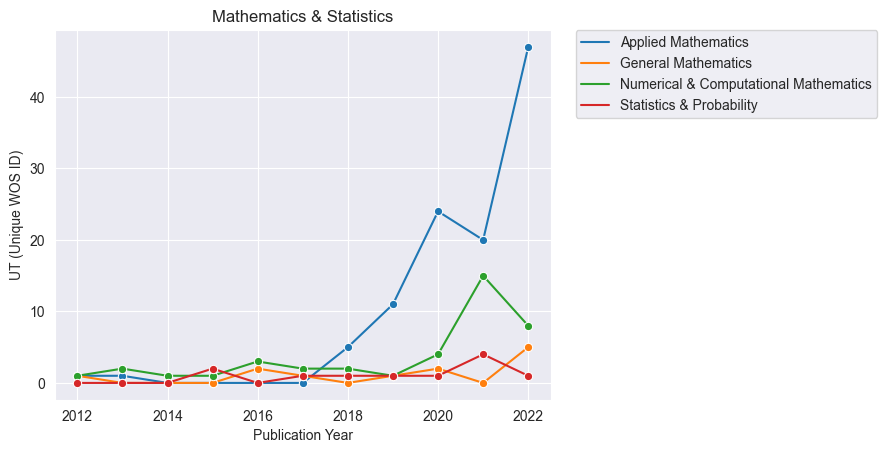

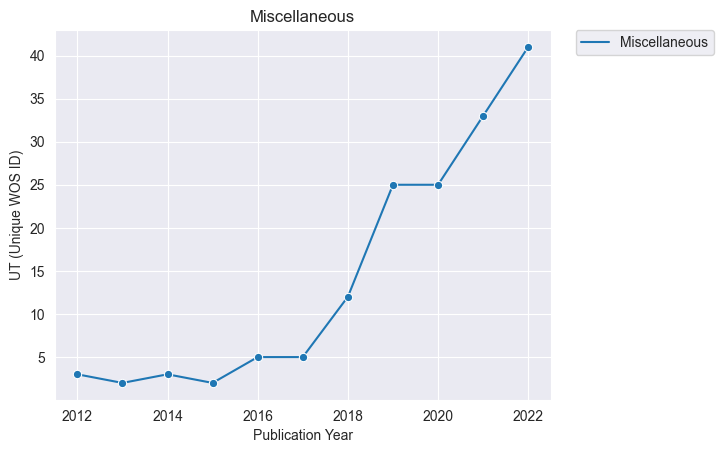

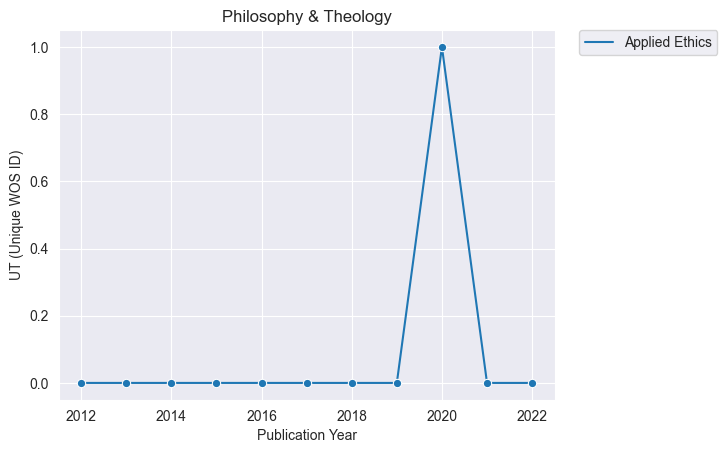

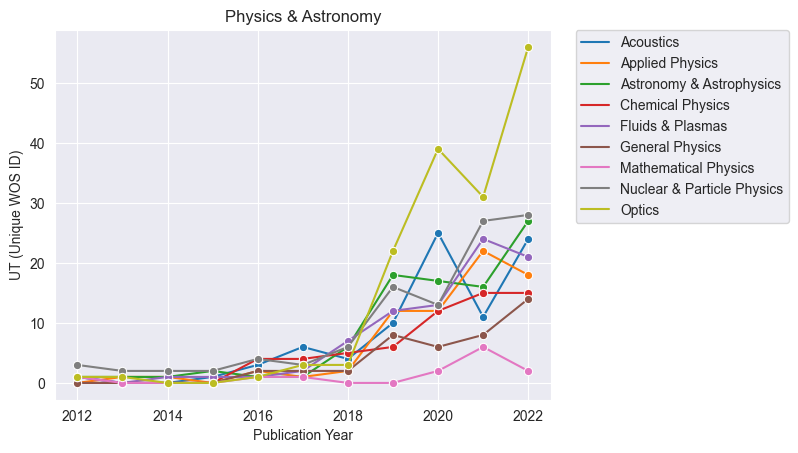

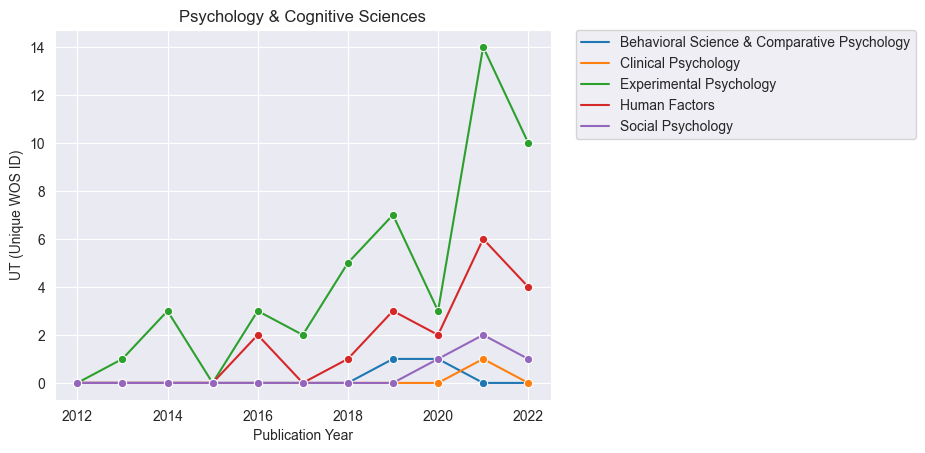

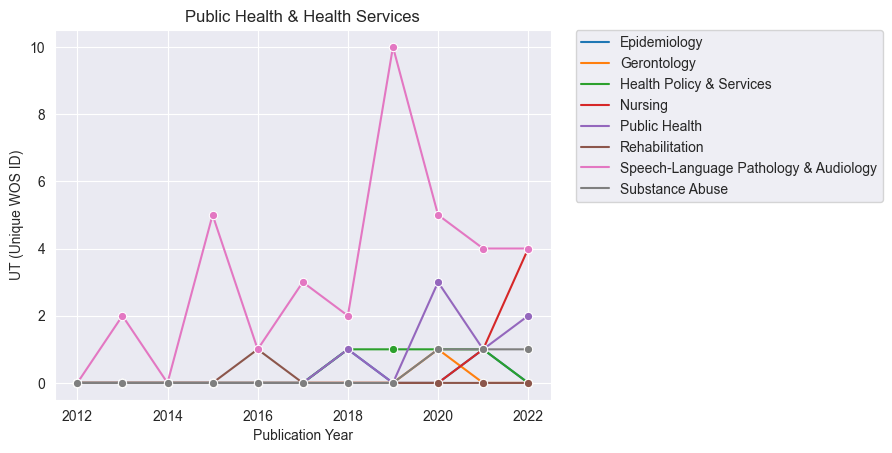

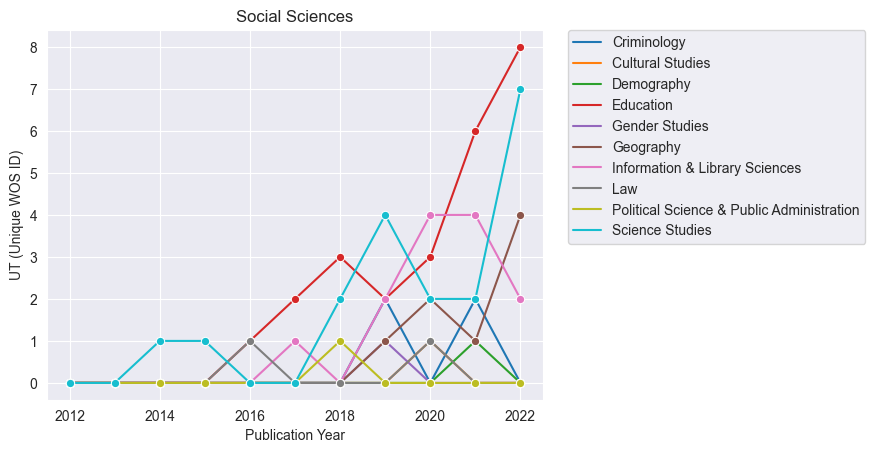

In [28]:
for cat in sorted(data[group[-2]].unique()):
    sub_data = data[data[group[-2]]==cat]
    sub_data = sub_data.complete({group[0]:range(int(data[group[0]].min()), int(data[group[0]].max()) + 1)}
                                 ,group[-1],fill_value=0)
    g=sns.lineplot(sub_data.sort_values(ascending=True, by=group[-1]),y=record_col,x=group[0],
                   hue=group[-1], marker="o")
    g.set(xticks=list(range(2012,2022+1,2)))
    g.legend(title=None,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncols=math.ceil(len(g.legend_.texts)/12))
    g.set_title(cat)
    plt.show()

## Collabs

### Country

In [29]:
wos_collabs = wos_addresses[wos_addresses["Country_Type"]!="Other"][[record_col,"Country"]].drop_duplicates()

In [30]:
country_collab = wos_collabs[wos_collabs["Country"]!="China"]["Country"].value_counts().reset_index()
country_collab["percent"] = country_collab["count"]/wos_collabs[record_col].nunique()
country_collab["weight"] = country_collab["count"]/wos_collabs[record_col].size
country_collab

Country  count   percent    weight
0          Germany   2309  0.233492  0.101095
1           France   1632  0.165032  0.071454
2            Italy   1260  0.127414  0.055166
3      Netherlands   1063  0.107493  0.046541
4            Spain    987  0.099808  0.043214
5           Sweden    832  0.084134  0.036427
6          Finland    700  0.070786  0.030648
7          Denmark    566  0.057235  0.024781
8          Ireland    552  0.055820  0.024168
9          Belgium    499  0.050460  0.021848
10          Poland    486  0.049146  0.021278
11         Austria    373  0.037719  0.016331
12        Portugal    365  0.036910  0.015981
13          Greece    320  0.032359  0.014011
14         Hungary    181  0.018303  0.007925
15  Czech Republic    144  0.014562  0.006305
16         Romania    133  0.013449  0.005823
17        Slovenia    111  0.011225  0.004860
18        Slovakia     75  0.007584  0.003284
19       Lithuania     68  0.006876  0.002977
20         Estonia     65  0.006573  0.002846
21      Luxembourg     59  0.005966  0.002583
22         Croatia     56  0.005663  0.002452
23        Bulgaria     48  0.004854  0.002102
24          Cyprus     35  0.003539  0.001532
25          Latvia     20  0.002022  0.000876
26           Malta     13  0.001315  0.000569

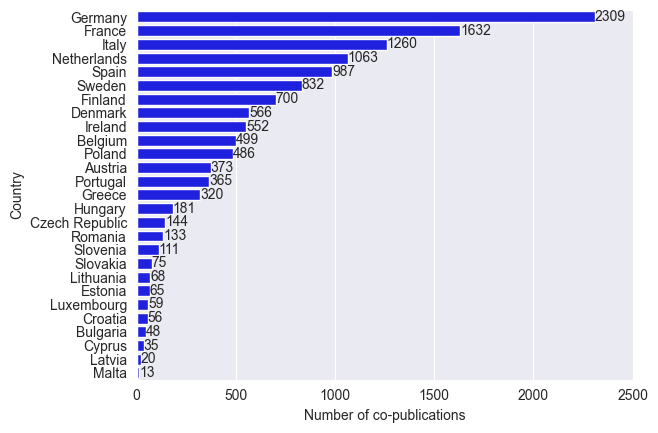

In [31]:
data = country_collab
g = sns.barplot(data, x="count", y="Country", color="blue")
g.set_xlim(0,2500)
g.set_ylabel("Country")
g.set_xlabel("Number of co-publications")
for i in g.containers:
    g.bar_label(i,)

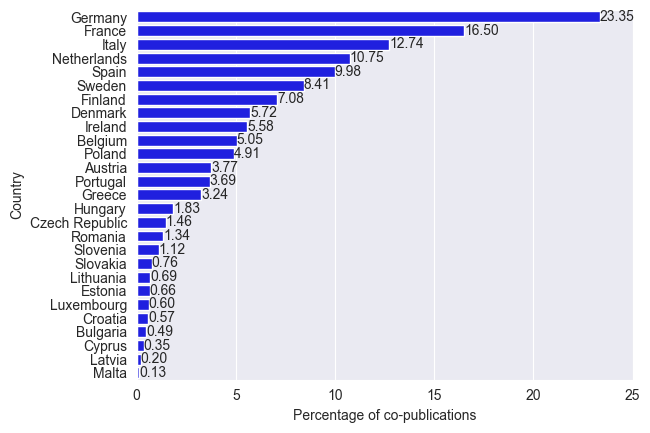

In [32]:
data = country_collab
data["percent_round"] = (data["percent"]*100).round(2)
g = sns.barplot(data, x="percent_round", y="Country", color="blue")
g.set_xlim(0,25)
g.set_ylabel("Country")
g.set_xlabel("Percentage of co-publications")
for i in g.containers:
    # g.bar_label(i,fmt='%.2f%%')
    g.bar_label(i,fmt='%.2f')

#### Per year

In [56]:
wos_collabs = wos_addresses[wos_addresses["Country_Type"]!="Other"][[record_col,"Country"]].drop_duplicates()
wos_collabs_y = wos_collabs.merge(wos, on=record_col)

In [111]:
countall = wos_collabs_y.groupby("Publication Year", as_index=False)[record_col].nunique()
data = wos_collabs_y.groupby("Publication Year", as_index=False)["Country"].value_counts().merge(countall, on="Publication Year")
data["percent"] = data["count"]/data[record_col]
data = data[data["Country"]!="China"]
data

Publication Year   Country  count  UT (Unique WOS ID)   percent
1                2012   Germany     15                  40  0.375000
2                2012     Italy      9                  40  0.225000
3                2012    France      9                  40  0.225000
4                2012     Spain      6                  40  0.150000
5                2012   Ireland      5                  40  0.125000
..                ...       ...    ...                 ...       ...
263              2022  Slovenia     13                2646  0.004913
264              2022    Cyprus     10                2646  0.003779
265              2022    Latvia      7                2646  0.002646
266              2022     Malta      6                2646  0.002268
267              2022  Bulgaria      5                2646  0.001890

[257 rows x 5 columns]

Text(0.5, 1.0, 'Number of co-publications per year')

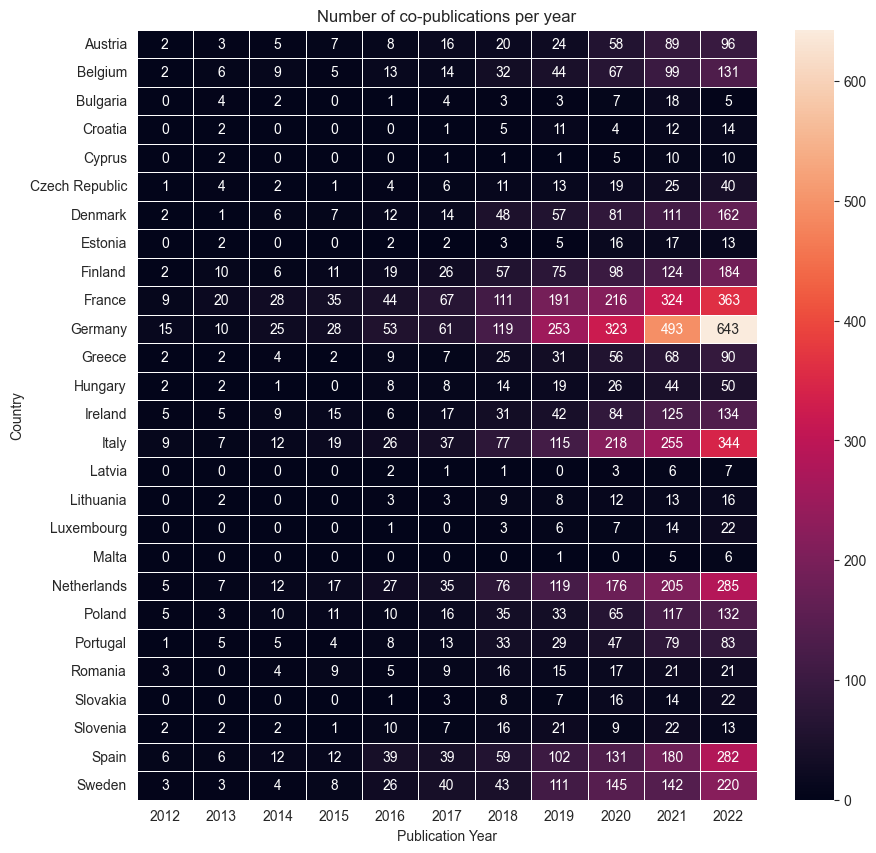

In [112]:
plt.figure(figsize=(10,10))
g = sns.heatmap(pd.pivot_table(data,columns="Publication Year", index="Country", values="count").fillna(0).astype(int),
            annot=True, fmt=".0f",linewidth=.5)
g.set_title("Number of co-publications per year")

Text(0.5, 1.0, 'Percentage of co-publications related to country per year')

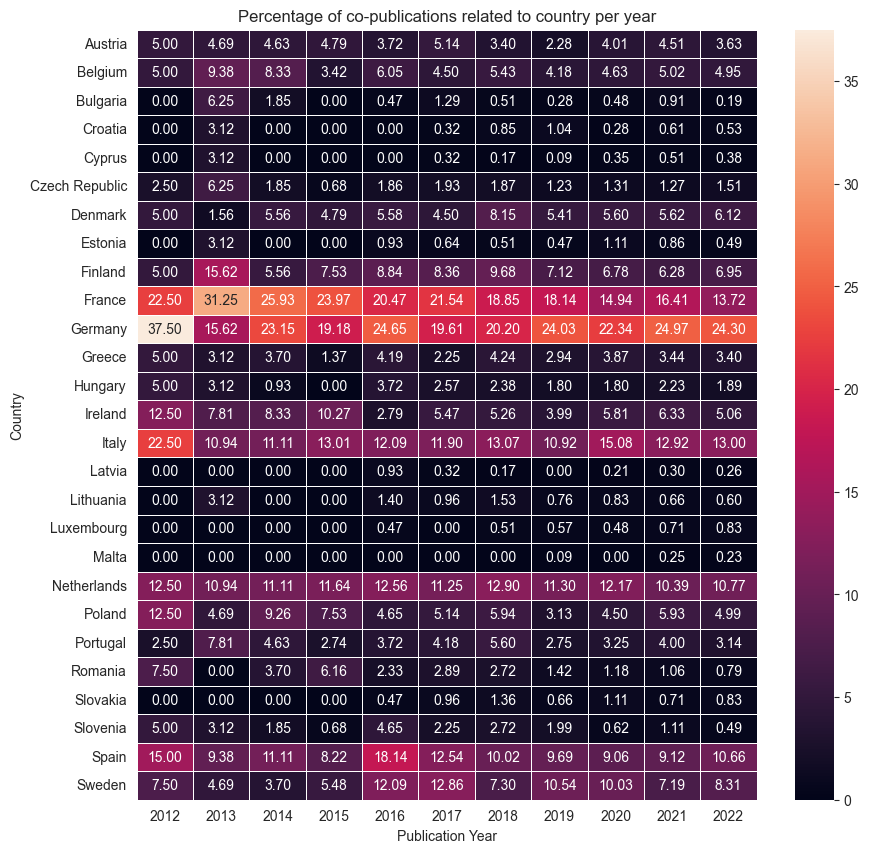

In [116]:
plt.figure(figsize=(10,10))
g = sns.heatmap(pd.pivot_table(data,columns="Publication Year", index="Country", values="percent").fillna(0)*100,
            annot=True, fmt=".2f",linewidth=.5)
g.set_title("Percentage of co-publications related to country per year")

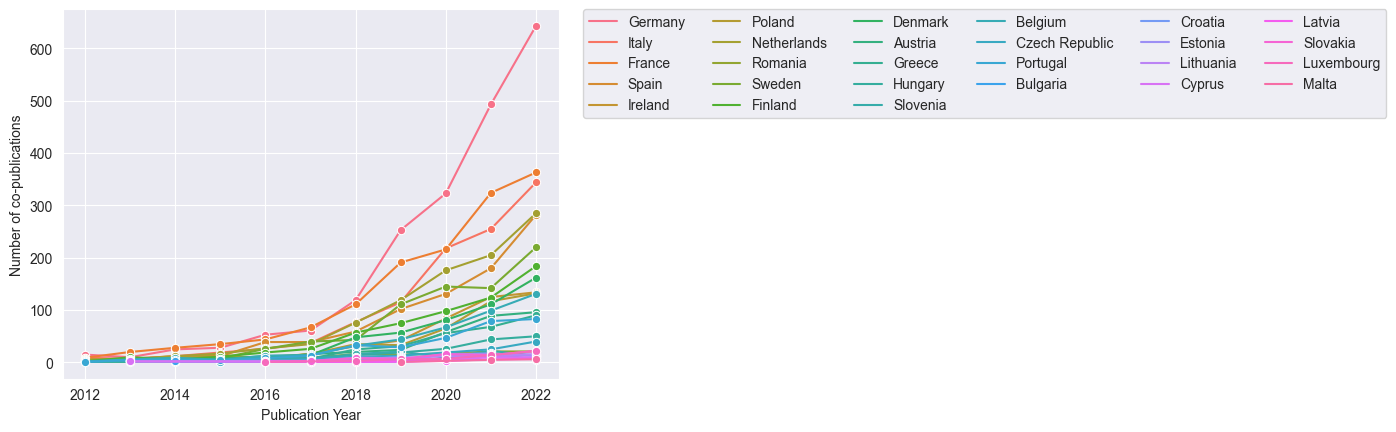

In [67]:
g=sns.lineplot(data,x="Publication Year",y="count",hue="Country", marker="o")
g.set(xticks=list(range(2012,2022+1,2)))
g.set_ylabel("Number of co-publications")
g.legend(title=None,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncols=math.ceil(len(g.legend_.texts)/5))

C:\Users\radvanyi\AppData\Roaming\Python\Python39\site-packages\seaborn\utils.py:456: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = old_legend.legendHandles


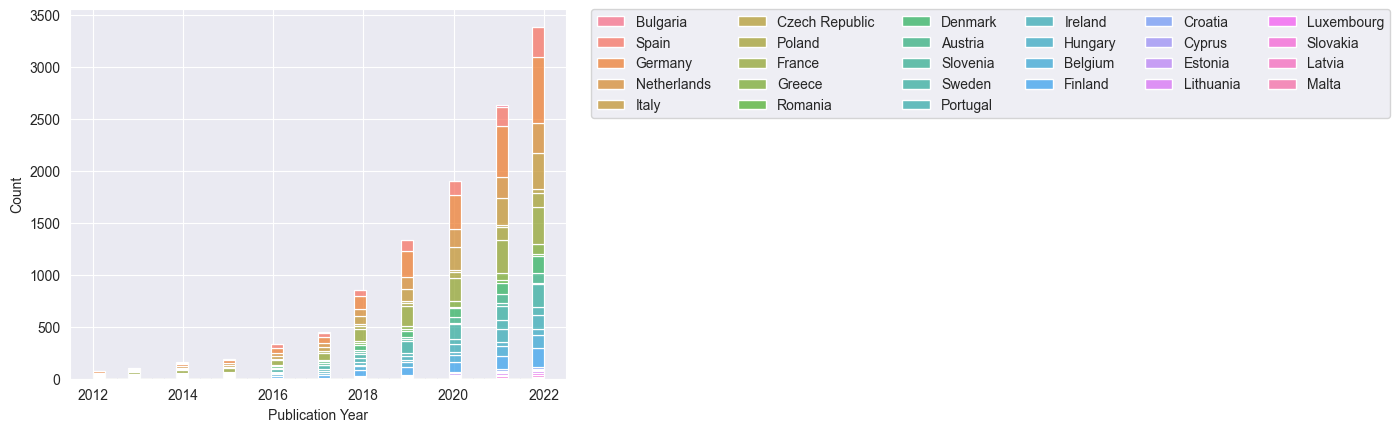

In [89]:
#(data,x="Publication Year",y="count",hue="Country", marker="o")
data = wos_collabs_y
data = data[data["Country"]!="China"]
g=sns.histplot(
    data,
    x="Publication Year", hue="Country",
    multiple="stack")
sns.move_legend(g,title=None,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncols=math.ceil(len(g.legend_.texts)/5))
# g._legend(bbox_to_anchor=(1.05, 1))

### Institution

In [157]:
wos_affiliations[["Affiliations","Affiliations_merged","Institution"]].nunique()

Affiliations           4873
Affiliations_merged    4240
Institution            6357
dtype: int64

In [158]:
aff = "Affiliations"

In [159]:
wos_affiliations.loc[wos_affiliations["Affiliations"].str.contains("(CNRS)", regex=True),["Affiliations","Country","Country_Type","City"]] = "CNRS","France","EU",None
wos_affiliations.loc[wos_affiliations["Affiliations"].str.contains("UDICE", regex=True),["Country","Country_Type","City"]] = "France","EU",None

C:\Users\radvanyi\AppData\Local\Temp\ipykernel_17172\580976551.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  wos_affiliations.loc[wos_affiliations["Affiliations"].str.contains("(CNRS)", regex=True),["Affiliations","Country","Country_Type","City"]] = "CNRS","France","EU",None


In [160]:
wos_inst_collabs = wos_affiliations[wos_affiliations["Country_Type"]!="Other"][[record_col,aff,"Country"]].drop_duplicates()

In [161]:
wos_inst_collabs[aff].nunique()

2761

In [162]:
# Institutions in China
inst_collab = wos_inst_collabs[wos_inst_collabs["Country"]=="China"][aff].value_counts().reset_index()
inst_collab["percent"] = inst_collab["count"]/wos_inst_collabs[record_col].nunique()
inst_collab["weight"] = inst_collab["count"]/wos_inst_collabs[record_col].size

top25_ch= inst_collab[0:25][aff].to_list()
inst_collab

Affiliations  count   percent   
0                           CHINESE ACADEMY OF SCIENCES   1128  0.114657  \
1        UNIVERSITY OF CHINESE ACADEMY OF SCIENCES, CAS    400  0.040659   
2                                   TSINGHUA UNIVERSITY    393  0.039947   
3                         SHANGHAI JIAO TONG UNIVERSITY    354  0.035983   
4                                   ZHEJIANG UNIVERSITY    337  0.034255   
...                                                 ...    ...       ...   
1376                      UNIVERSITY SYSTEM OF MARYLAND      1  0.000102   
1377             LUNENFELD TANENBAUM RESEARCH INSTITUTE      1  0.000102   
1378  WUHAN RESEARCH INSTITUTE OF POST & TELECOMMUNI...      1  0.000102   
1379                                ZHAOTONG UNIVERSITY      1  0.000102   
1380  INSTITUTE OF QUALITY STANDARDS & TESTING TECHN...      1  0.000102   

        weight  
0     0.027827  
1     0.009868  
2     0.009695  
3     0.008733  
4     0.008314  
...        ...  
1376  0.000025  
1377  0.000025  
1378  0.000025  
1379  0.000025  
1380  0.000025  

[1381 rows x 4 columns]

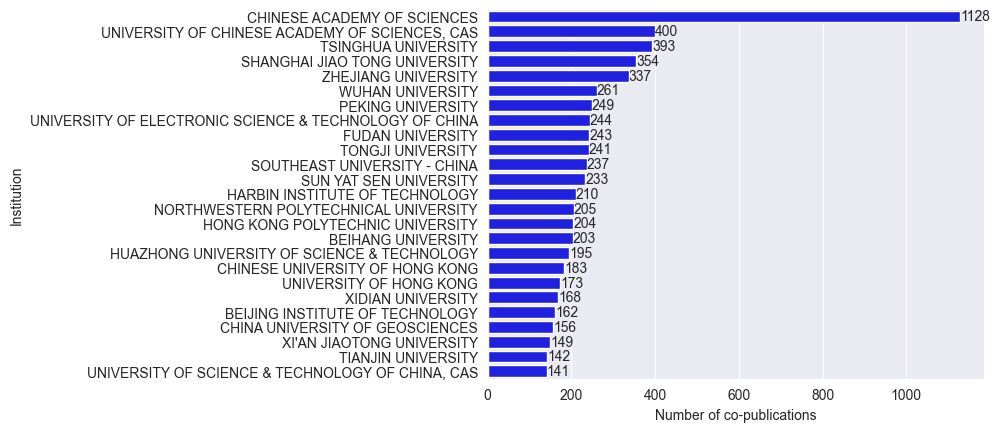

In [163]:
data = inst_collab[0:25]
g = sns.barplot(data, x="count", y=aff, color="blue")
g.set_ylabel("Institution")
g.set_xlabel("Number of co-publications")
for i in g.containers:
    g.bar_label(i,)

* observe: CNRS --> Institution - country merge needs some more work

In [164]:
# Institutions in EU
inst_collab = wos_inst_collabs[wos_inst_collabs["Country"]!="China"][aff].value_counts().reset_index()
inst_collab["percent"] = inst_collab["count"]/wos_inst_collabs[record_col].nunique()
inst_collab["weight"] = inst_collab["count"]/wos_inst_collabs[record_col].size

top25_eu = inst_collab[0:25][aff].to_list()
inst_collab

Affiliations  count   percent    weight
0        UDICE-FRENCH RESEARCH UNIVERSITIES    647  0.065765  0.015961
1                                      CNRS    640  0.065054  0.015788
2                     HELMHOLTZ ASSOCIATION    311  0.031612  0.007672
3            TECHNICAL UNIVERSITY OF MUNICH    308  0.031307  0.007598
4            DELFT UNIVERSITY OF TECHNOLOGY    242  0.024598  0.005970
...                                     ...    ...       ...       ...
1890                           ADVENTHEALTH      1  0.000102  0.000025
1891               ACIBADEM HOSPITALS GROUP      1  0.000102  0.000025
1892                      INSTITUT BERGONIE      1  0.000102  0.000025
1893  TEHRAN UNIVERSITY OF MEDICAL SCIENCES      1  0.000102  0.000025
1894          HOSPITAL UNIVERSITARIO LA PAZ      1  0.000102  0.000025

[1895 rows x 4 columns]

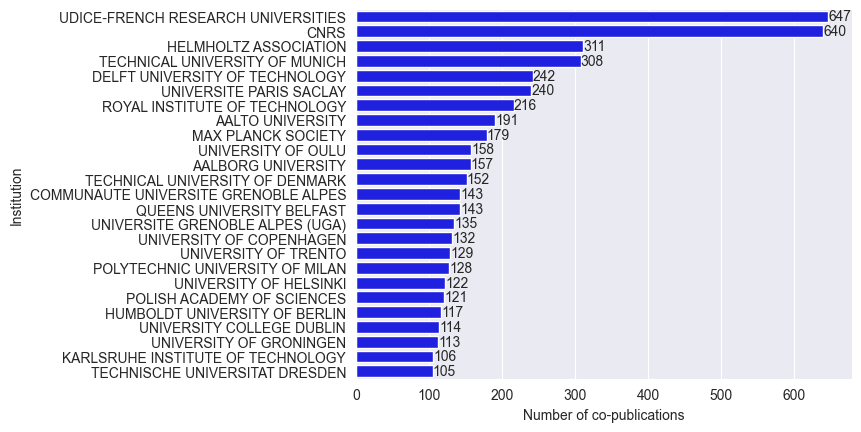

In [165]:
data = inst_collab[0:25]
g = sns.barplot(data, x="count", y=aff, color="blue")
# g.set_xlim(0,6000)
g.set_ylabel("Institution")
g.set_xlabel("Number of co-publications")
for i in g.containers:
    g.bar_label(i,)

# Again but cleaning up a bit for top25

In [166]:
wos_affiliations.loc[wos_affiliations["Affiliations"].isin(top25_eu),"Country_Type"] = "EU"
wos_affiliations.loc[wos_affiliations["Affiliations"].isin(top25_ch),"Country_Type"] = "China"
wos_inst_collabs = wos_affiliations[wos_affiliations["Country_Type"]!="Other"][[record_col,aff,"Country_Type"]].drop_duplicates()

In [167]:
# Institutions in China
inst_collab = wos_inst_collabs[wos_inst_collabs["Country_Type"]=="China"][aff].value_counts().reset_index()
inst_collab["percent"] = inst_collab["count"]/wos_inst_collabs[record_col].nunique()
inst_collab["weight"] = inst_collab["count"]/wos_inst_collabs[record_col].size
inst_collab

Affiliations  count   percent   
0                           CHINESE ACADEMY OF SCIENCES   1188  0.120756  \
1        UNIVERSITY OF CHINESE ACADEMY OF SCIENCES, CAS    411  0.041777   
2                                   TSINGHUA UNIVERSITY    393  0.039947   
3                         SHANGHAI JIAO TONG UNIVERSITY    355  0.036085   
4                                   ZHEJIANG UNIVERSITY    337  0.034255   
...                                                 ...    ...       ...   
1361                      UNIVERSITY SYSTEM OF MARYLAND      1  0.000102   
1362             LUNENFELD TANENBAUM RESEARCH INSTITUTE      1  0.000102   
1363  WUHAN RESEARCH INSTITUTE OF POST & TELECOMMUNI...      1  0.000102   
1364                                ZHAOTONG UNIVERSITY      1  0.000102   
1365  INSTITUTE OF QUALITY STANDARDS & TESTING TECHN...      1  0.000102   

        weight  
0     0.029307  
1     0.010139  
2     0.009695  
3     0.008757  
4     0.008313  
...        ...  
1361  0.000025  
1362  0.000025  
1363  0.000025  
1364  0.000025  
1365  0.000025  

[1366 rows x 4 columns]

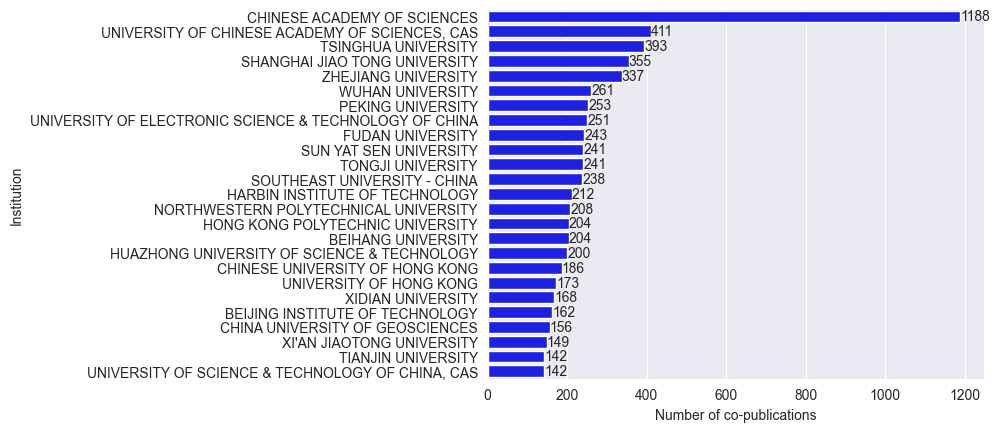

In [168]:
data = inst_collab[0:25]
g = sns.barplot(data, x="count", y=aff, color="blue")
g.set_ylabel("Institution")
g.set_xlabel("Number of co-publications")
for i in g.containers:
    g.bar_label(i,)

In [169]:
# Institutions in EU
inst_collab = wos_inst_collabs[wos_inst_collabs["Country_Type"]!="China"][aff].value_counts().reset_index()
inst_collab["percent"] = inst_collab["count"]/wos_inst_collabs[record_col].nunique()
inst_collab["weight"] = inst_collab["count"]/wos_inst_collabs[record_col].size
inst_collab

Affiliations  count   percent   
0                    UDICE-FRENCH RESEARCH UNIVERSITIES    647  0.065765  \
1                                                  CNRS    640  0.065054   
2                                 HELMHOLTZ ASSOCIATION    427  0.043403   
3                        TECHNICAL UNIVERSITY OF MUNICH    312  0.031714   
4                               UNIVERSITE PARIS SACLAY    254  0.025818   
...                                                 ...    ...       ...   
1878  GREAT ORMOND STREET HOSPITAL FOR CHILDREN NHS ...      1  0.000102   
1879                                    GELRE HOSPITALS      1  0.000102   
1880                                   EMORY UNIVERSITY      1  0.000102   
1881              ELISABETH-TWEESTEDEN ZIEKENHUIS (ETZ)      1  0.000102   
1882                      HOSPITAL UNIVERSITARIO LA PAZ      1  0.000102   

        weight  
0     0.015961  
1     0.015788  
2     0.010534  
3     0.007697  
4     0.006266  
...        ...  
1878  0.000025  
1879  0.000025  
1880  0.000025  
1881  0.000025  
1882  0.000025  

[1883 rows x 4 columns]

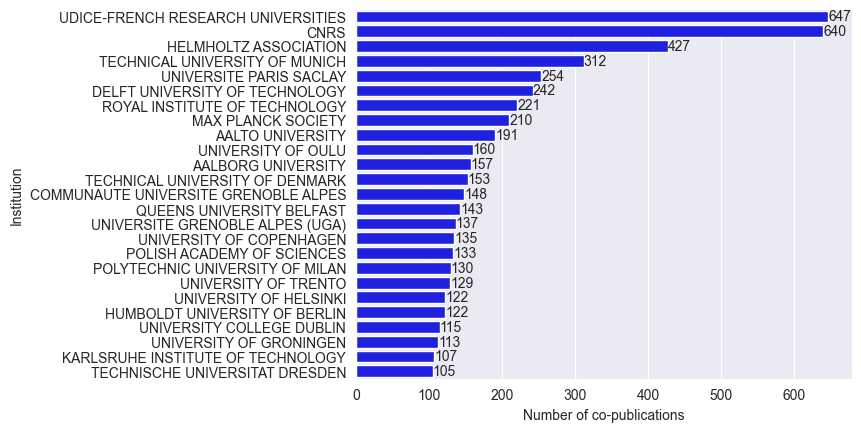

In [170]:
data = inst_collab[0:25]
g = sns.barplot(data, x="count", y=aff, color="blue")
g.set_ylabel("Institution")
g.set_xlabel("Number of co-publications")
for i in g.containers:
    g.bar_label(i,)